## 開始進入 D(eep)NN 世界

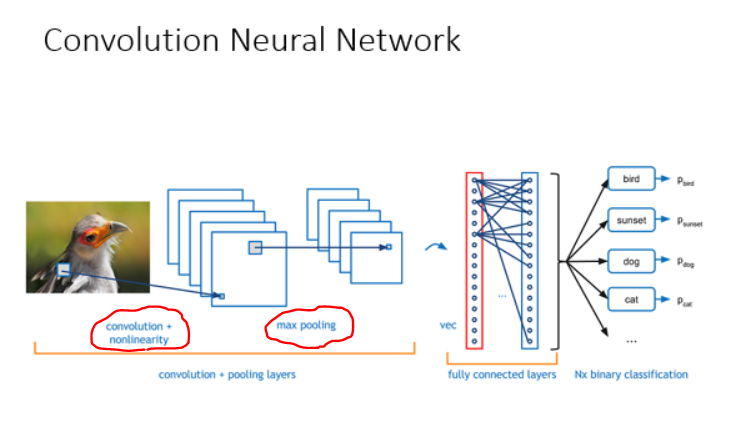

## 改用 CNN 實作手寫數字辨識

* Parameters init.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


* Download MNIST dataset

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

* Data processing

In [3]:
if K.image_data_format() == 'channels_first':
    print("channels_first")
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build network
* 參考這篇 [論文](http://scs.ryerson.ca/~aharley/vis/conv/flat.html) network
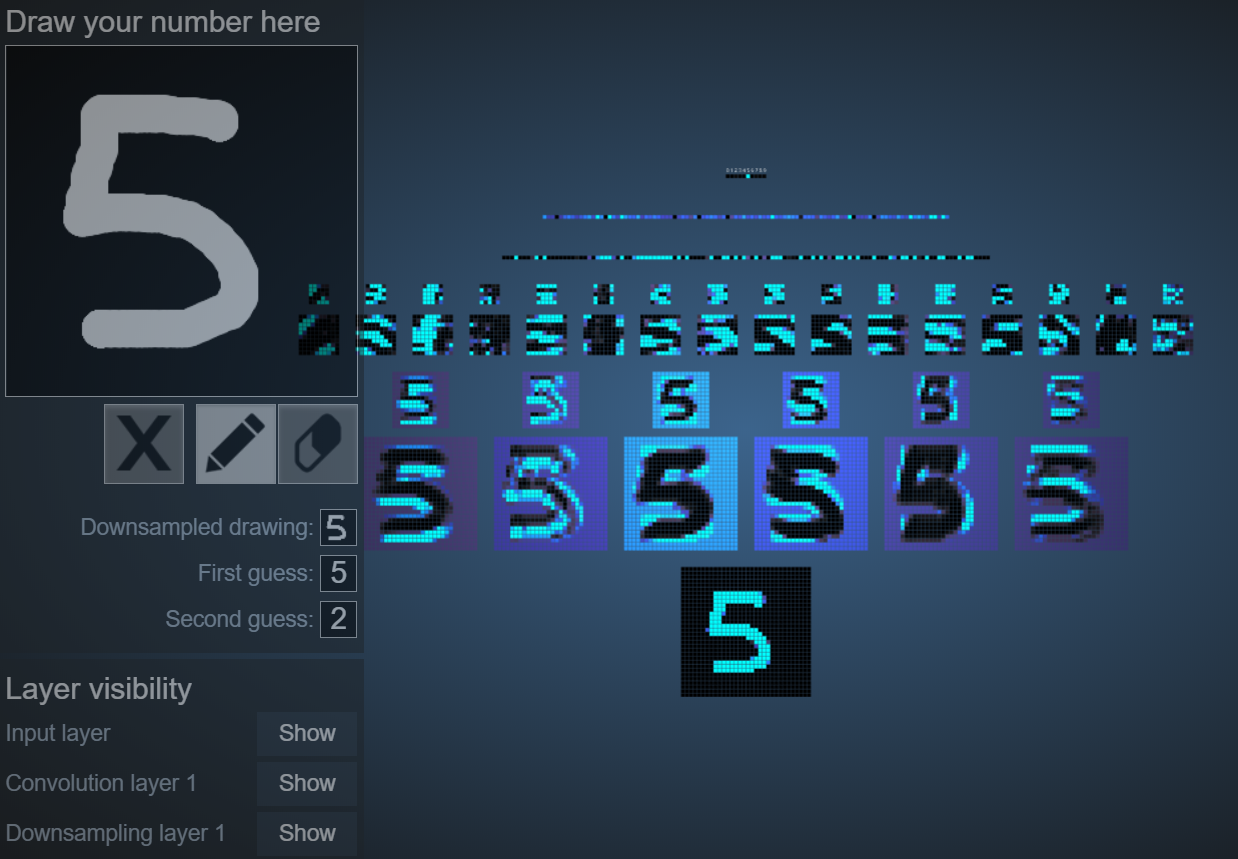

* Layer 1: convolution layer, filter size 3x3, stride 1, padding none, ReLU
* Layer 2: max pooling, size 2x2
* Layer 3: convolution layer, filter size 3x3, stride 1, padding none, ReLU
* Layer 4: max pooling, size 2x2
* Layer 5: flatten
* Layer 6: full connected, ReLU
* Layer 7: output, full connected, softmax

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


* 選擇 loss function
* 選擇 optimizer

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

## 開始訓練
* 很明顯變數超過百萬(1,199,882), 使用 CPU 計算每次 epoch 時間要超過 600 sec.

In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 642s 11ms/step - loss: 0.1585 - acc: 0.9533 - val_loss: 0.0517 - val_acc: 0.9837
Epoch 2/5
60000/60000 [==============================] - 612s 10ms/step - loss: 0.0459 - acc: 0.9859 - val_loss: 0.0421 - val_acc: 0.9862
Epoch 3/5
60000/60000 [==============================] - 608s 10ms/step - loss: 0.0331 - acc: 0.9901 - val_loss: 0.0394 - val_acc: 0.9861
Epoch 4/5
60000/60000 [==============================] - 536s 9ms/step - loss: 0.0255 - acc: 0.9924 - val_loss: 0.0333 - val_acc: 0.9888
Epoch 5/5
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0199 - acc: 0.9944 - val_loss: 0.0345 - val_acc: 0.9886


In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034475998921954305
Test accuracy: 0.9886
